# Challenge 1
Identify a loud binary black hole signal in white, Gaussian noise.

*   Use the data file "challenge1.gwf". The channel name is "H1:CHALLENGE1".

*   The data are white, Gaussian noise containing a simulated BBH signal.

1.  Load the data into memory. What are the sampling rate and duration of the data?
2.  Plot the data in the time-domain.
3.  Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
4.  What is the time of the merger?






## Install and load the data
Install the appropriate software:

In [ ]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install matplotlib==3.1.3


     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Load the data into memory:

> (if this gives an error, reset the runtime and rerun the previous steps)




In [ ]:

! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

--2022-02-15 01:22:25--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.2’

challenge1.gwf.2    100%[===================>]   3.84M  1.54MB/s    in 2.5s    

2022-02-15 01:22:28 (1.54 MB/s) - ‘challenge1.gwf.2’ saved [4025674/4025674]



## Question 1
What are the sampling rate and duration of the data?

In [ ]:
print(gwpy_strain)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)


dt represents the time between succesive samples, of which the sample rate can be determined. 
This is the inverse:

In [ ]:
samplerate = 1/gwpy_strain.dt
print("Sampling rate = ", samplerate)

Sampling rate =  4096.0 1 / s


The duration of the data is:

In [ ]:
gwpy_strain.duration

<Quantity 128. s>

# Question 2 
Plot the data in the time-domain

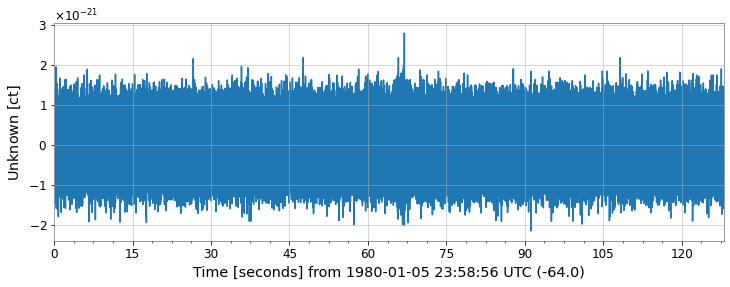

In [ ]:
plot = gwpy_strain.plot()

## Question 3
Plot a spectrogram (or q-transform) of the data, and try to identify the signal.

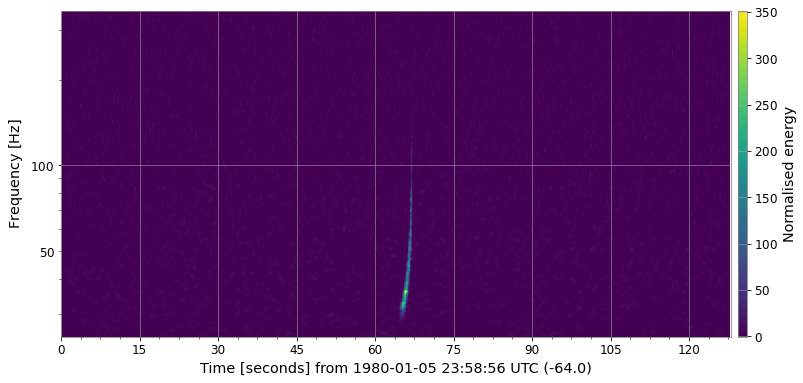

In [ ]:
q_transform = gwpy_strain.q_transform(frange = (25, 350), qrange = (100, 120))
plot = q_transform.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

And a zoomed in version:

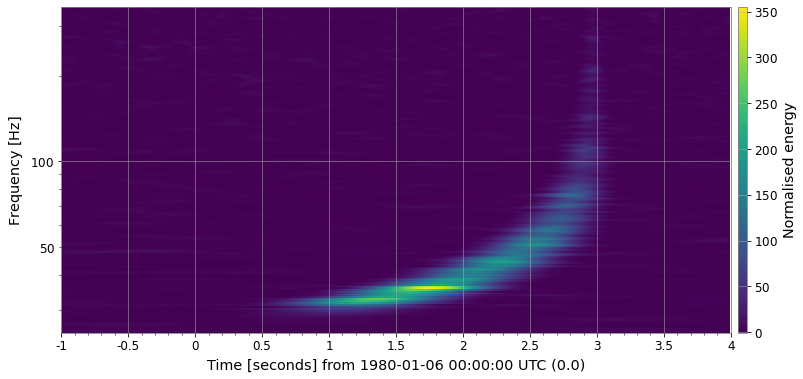

In [ ]:
qzoomed_transform = gwpy_strain.q_transform(frange = (25, 350), qrange = (100, 120), outseg= (-1, 4))
plot = qzoomed_transform.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")



## Question 4
What is the time of the merger?

The time of the merge happened around 67 seconds into the former graph or about 3 seconds into the latter graph.

The time stamp of both events can be found underneath the graph, so adding the moment of the merge onto the time stamp, you find that the merge happened at 1980-01-06 at 00:00:03 UTC
